## Using the ktk.cycles.detect_cycles to define trials (repetitions)

In [88]:
import kineticstoolkit.lab as ktk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the c3d files

In [89]:
c3d_contents = ktk.read_c3d('Squat_2_0001.c3d', convert_point_unit=True)

## Extracting Marker Data (SIAS_left)

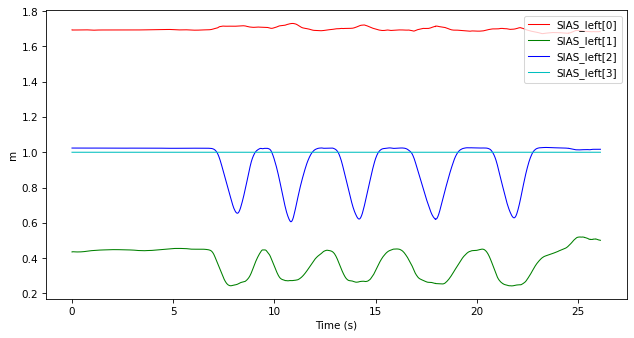

In [90]:
mrkr_info = c3d_contents["Points"]
mrkr_data = mrkr_info.data
r_asis = mrkr_info.get_subset(["SIAS_right"])
l_asis = mrkr_info.get_subset(["SIAS_left"])
l_asis.plot()

## Finding Repetitions using the ktk.cycles.detect_cycles

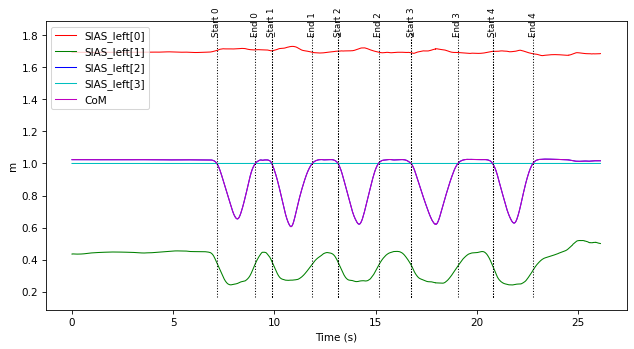

In [91]:
l_asis.data["CoM"] = l_asis.data["SIAS_left"][:,2]
start_end = ktk.cycles.detect_cycles(l_asis, "CoM", event_names=["Start", "End"], thresholds=[1, 1], directions=["Falling"])
start_end.plot()

## Time-Normalizing the cycles

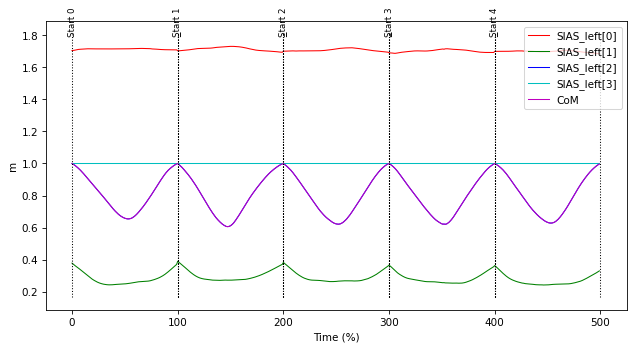

In [92]:
start_end_norm = ktk.cycles.time_normalize(start_end, event_name1='Start', event_name2="End")
start_end_norm.plot()

## Combining Trials and plot

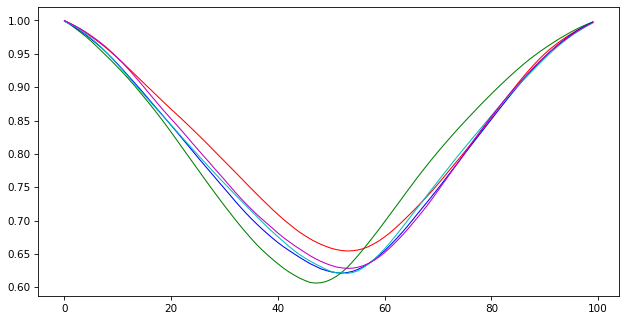

In [93]:
start_end_comb = ktk.cycles.stack(start_end_norm)
# start_end_comb
n_cycles = start_end_comb["CoM"].shape[0]
n_cycles
for idx in range(n_cycles):
    plt.plot(start_end_comb["CoM"][idx])